In [3]:
import pandas as pd
import missingno as ms
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
col_names = ['pregnant' , 'glucose' , 'bp' , 'skin' , 'insulin' , 'bmi' , 'pedigree' , 'age' , 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [15]:
pima.describe().transpose()

,count,unique,top,freq
pregnant,768,17,1,135
glucose,768,136,99,17
bp,768,47,70,57
skin,768,51,0,227
insulin,768,186,0,374
bmi,768,248,32,13
pedigree,768,517,0.258,6
age,768,52,22,72
label,768,2,0,500


In [16]:
pima.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


<Axes: >

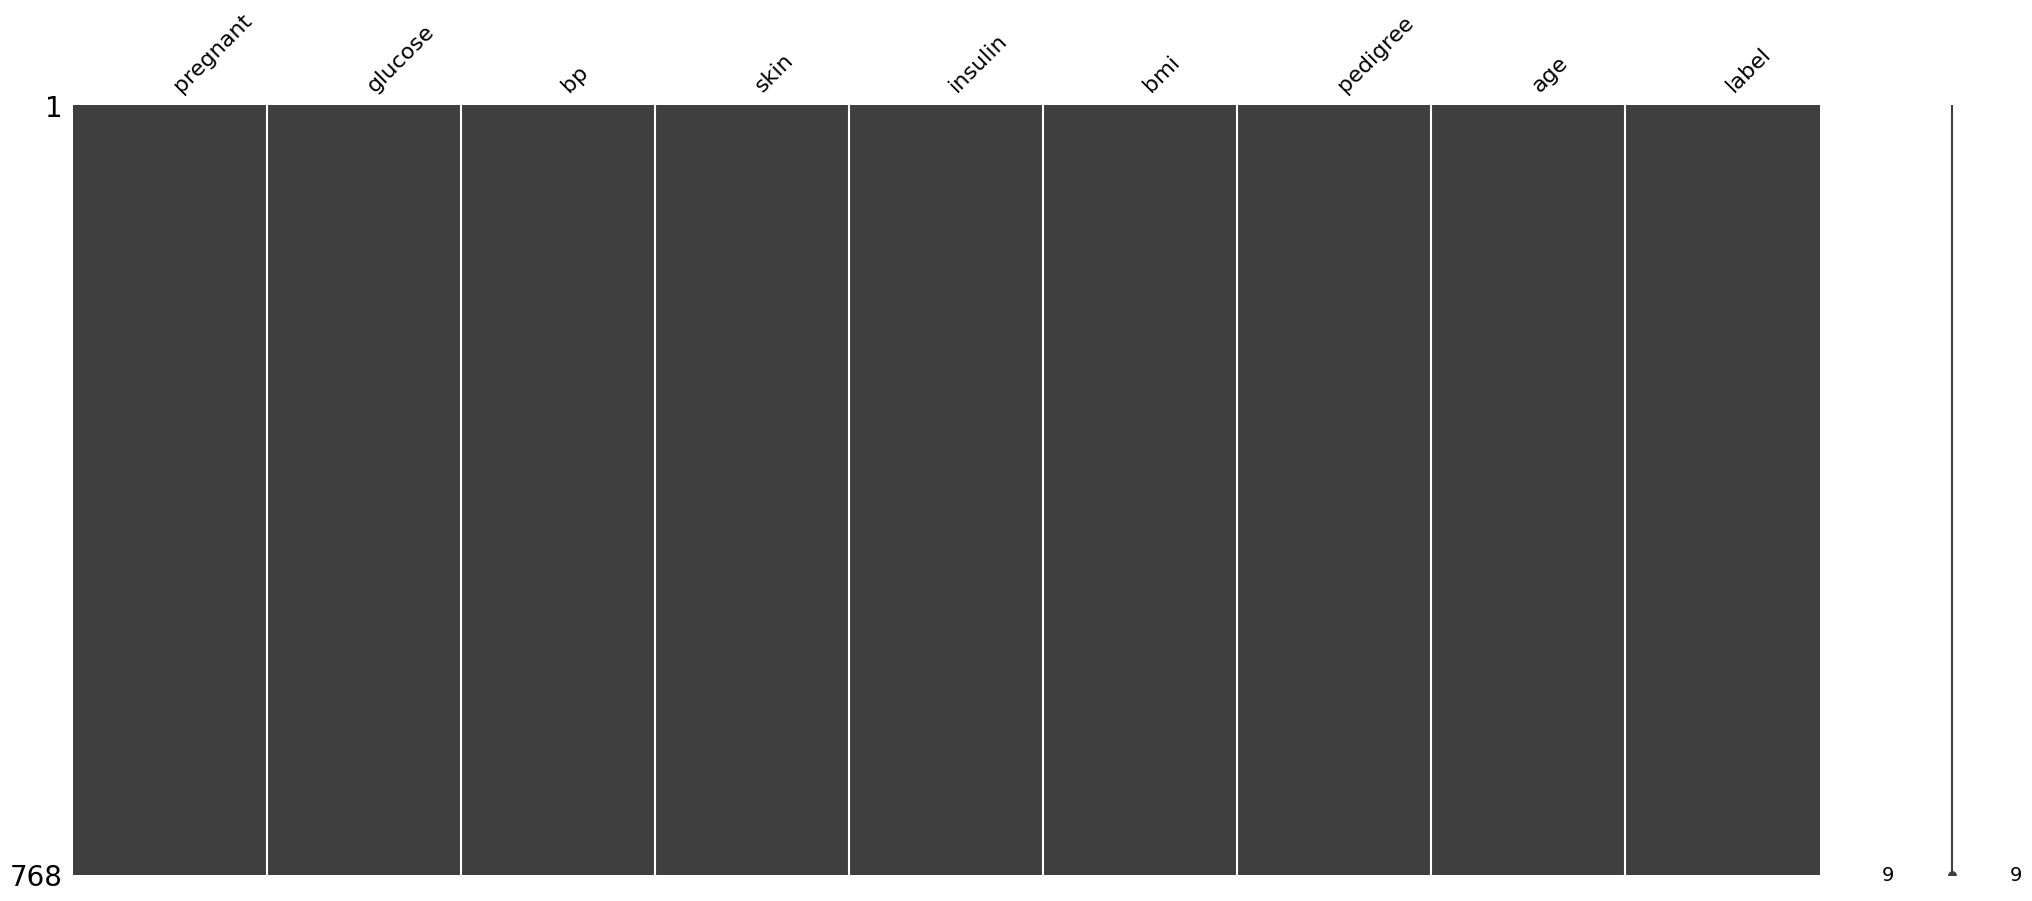

In [18]:
ms.matrix(pima)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [6]:
pima.drop([0],axis=0,inplace = True)

In [7]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [8]:
feature_cols = ['pregnant' , 'insulin' , 'bmi' , 'age' , 'glucose' , 'bp' , 'pedigree']
x = pima[feature_cols]
y = pima.label

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)


In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , Y_train)
y_pred = logreg.predict(X_test)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 427.9555555555555, 'Predicted label')

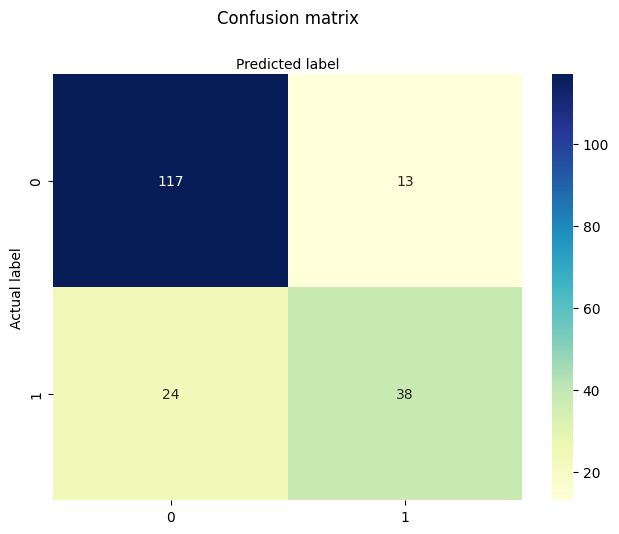

In [13]:
class_names = [0,1]
flg,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot = True, cmap = 'YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [14]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8072916666666666
